In [ ]:
#<start>only for colab users

In [ ]:
!pip install mtcnn

In [ ]:
!mkdir images

In [ ]:
!wget https://github.com/Alireza-Akhavan/deep-face-recognition/raw/master/images/m.jpg -P images

In [ ]:
#<end>only for colab users

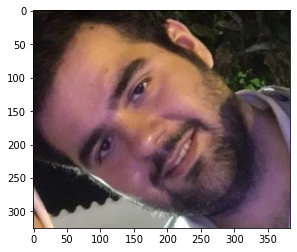

In [1]:
from mtcnn.mtcnn import MTCNN
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import math
img = plt.imread("./images/m.jpg")
plt.imshow(img)
plt.show()

In [2]:
face_detector = MTCNN()

In [3]:
# draw an image with detected objects
def draw_facebox_and_keypoints(filename, result_list):
    # load the image
    data = plt.imread(filename)
    # plot the image
    plt.imshow(data)
    # get the context for drawing boxes
    ax = plt.gca()
    # plot each box
    for result in result_list:
        # get coordinates
        x, y, width, height = result['box']
        # create the shape
        rect = plt.Rectangle((x, y), width, height,fill=False, color='orange')
        # draw the box
        ax.add_patch(rect)
        # draw the dots
        for key, value in result['keypoints'].items():
            # create and draw dot
            dot = plt.Circle(value, radius=2, color='red')
            ax.add_patch(dot)
            # show the plot
    plt.show()# filename = 'test1.jpg' # filename is defined above, otherwise uncomment

In [5]:
results = face_detector.detect_faces(img)

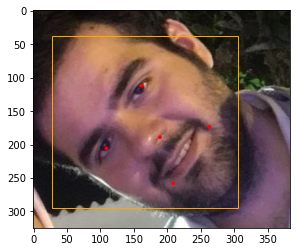

In [6]:
draw_facebox_and_keypoints('./images/m.jpg', results)

## mrthod 2

In [8]:
src = np.array([
       [  54.70657349,   73.85186005],
       [ 105.04542542,   73.57342529],
       [  80.03600311,  102.48085785],
       [  59.35614395,  131.95071411],
       [ 101.04272461,  131.72013855]], dtype=np.float32)

landmark = np.array([results[0]['keypoints']['left_eye'],\
            results[0]['keypoints']['right_eye'],\
            results[0]['keypoints']['nose'],\
            results[0]['keypoints']['mouth_left'],\
            results[0]['keypoints']['mouth_right']])

In [9]:
from skimage import transform as trans

dst = landmark.astype(np.float32)
tform = trans.SimilarityTransform()
tform.estimate(dst, src)
M = tform.params[0:2,:]
M

array([[  0.24112199,  -0.41067954, 112.21784971],
       [  0.41067954,   0.24112199, -19.11796535]])

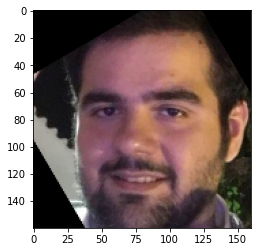

In [10]:
import cv2
wrapped = cv2.warpAffine(img,M,(160,160), borderValue = 0.0)
plt.imshow(wrapped)
plt.show()